In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/hotel.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')

In [5]:
hotel_df.drop(['arrival_date_day_of_month','arrival_date_week_number', 'reservation_status_date', 'name', 'email','phone-number','credit_card'], axis=1, inplace=True)

In [6]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


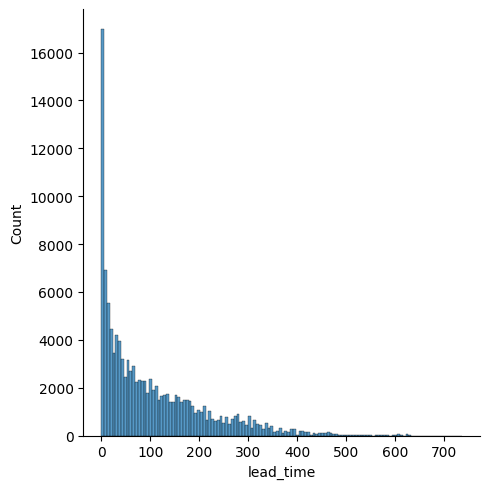

In [7]:
sns.displot(hotel_df['lead_time'])

<Axes: ylabel='lead_time'>

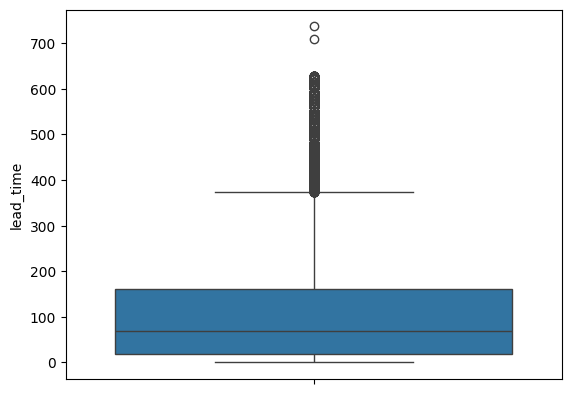

In [8]:
sns.boxplot(y = hotel_df['lead_time'])

In [9]:
hotel_df = hotel_df[hotel_df['adr'] >= 0]

<Axes: xlabel='distribution_channel', ylabel='is_canceled'>

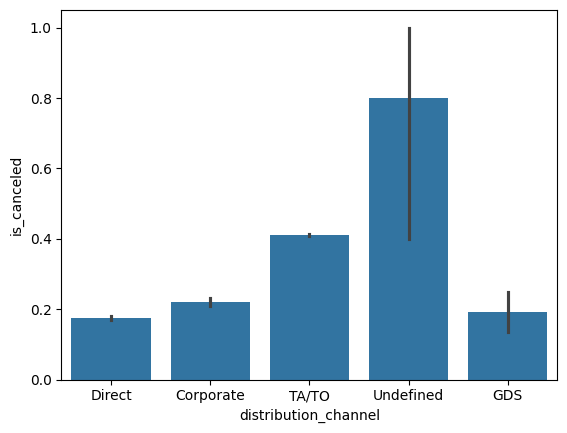

In [10]:
sns.barplot(x = hotel_df['distribution_channel'], y=hotel_df['is_canceled'])

In [11]:
hotel_df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97870
Direct,14644
Corporate,6677
GDS,193
Undefined,5


<Axes: xlabel='hotel', ylabel='is_canceled'>

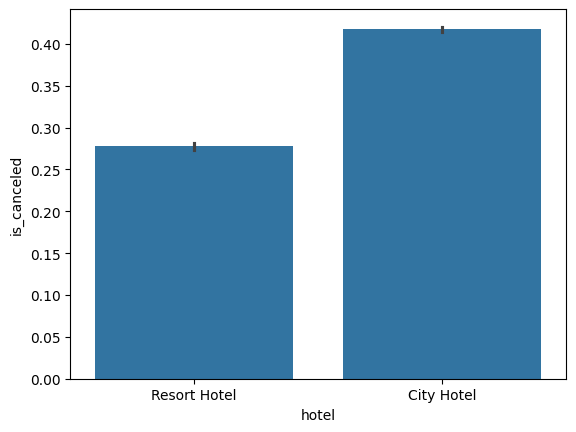

In [12]:
sns.barplot(x=hotel_df['hotel'], y=hotel_df['is_canceled'])

<Axes: xlabel='arrival_date_year', ylabel='is_canceled'>

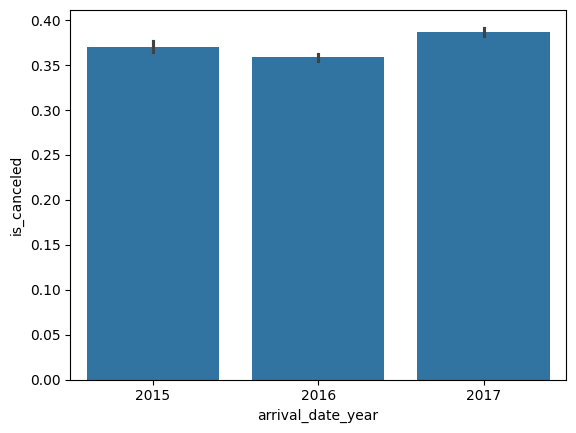

In [13]:
sns.barplot(x=hotel_df['arrival_date_year'], y=hotel_df['is_canceled'])

In [14]:
import calendar
months = []

for i in range(1, 13):
  months.append(calendar.month_name[i])

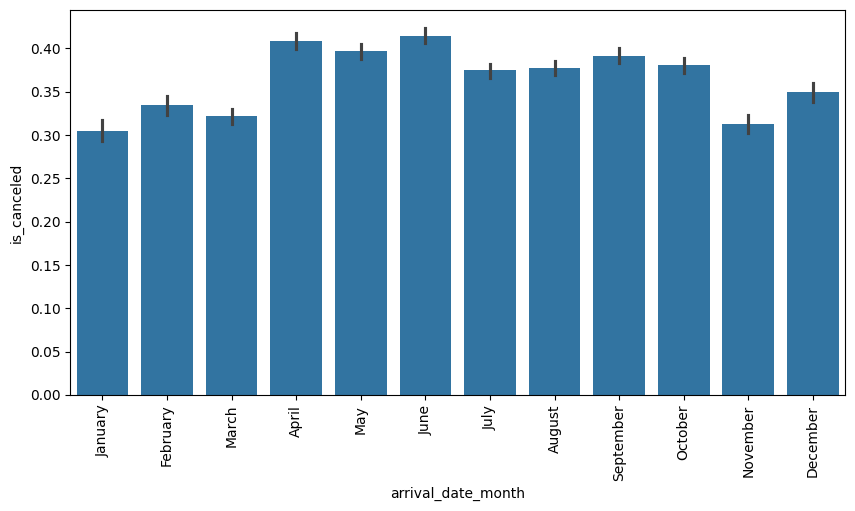

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=hotel_df['arrival_date_month'], y=hotel_df['is_canceled'], order = months)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='is_repeated_guest', ylabel='is_canceled'>

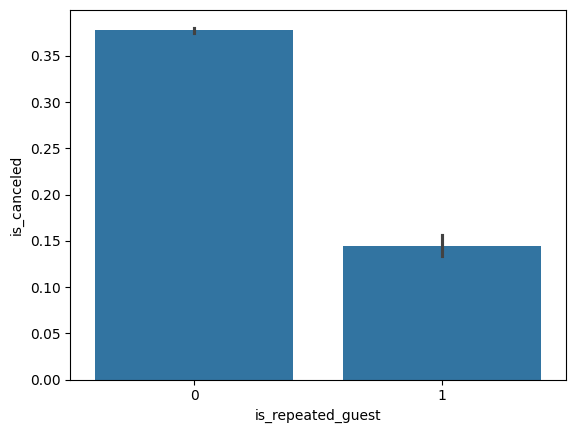

In [16]:
sns.barplot(x=hotel_df['is_repeated_guest'], y=hotel_df['is_canceled'])

<Axes: xlabel='deposit_type', ylabel='is_canceled'>

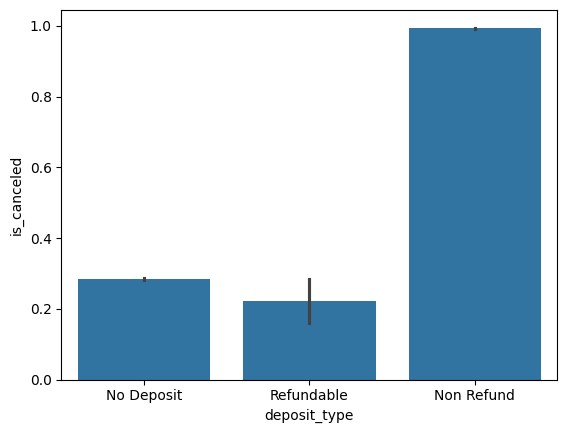

In [17]:
sns.barplot(x=hotel_df['deposit_type'], y=hotel_df['is_canceled'])

In [18]:
hotel_df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104640
Non Refund,14587
Refundable,162


In [19]:
cols = hotel_df.select_dtypes(['int', 'float']).columns

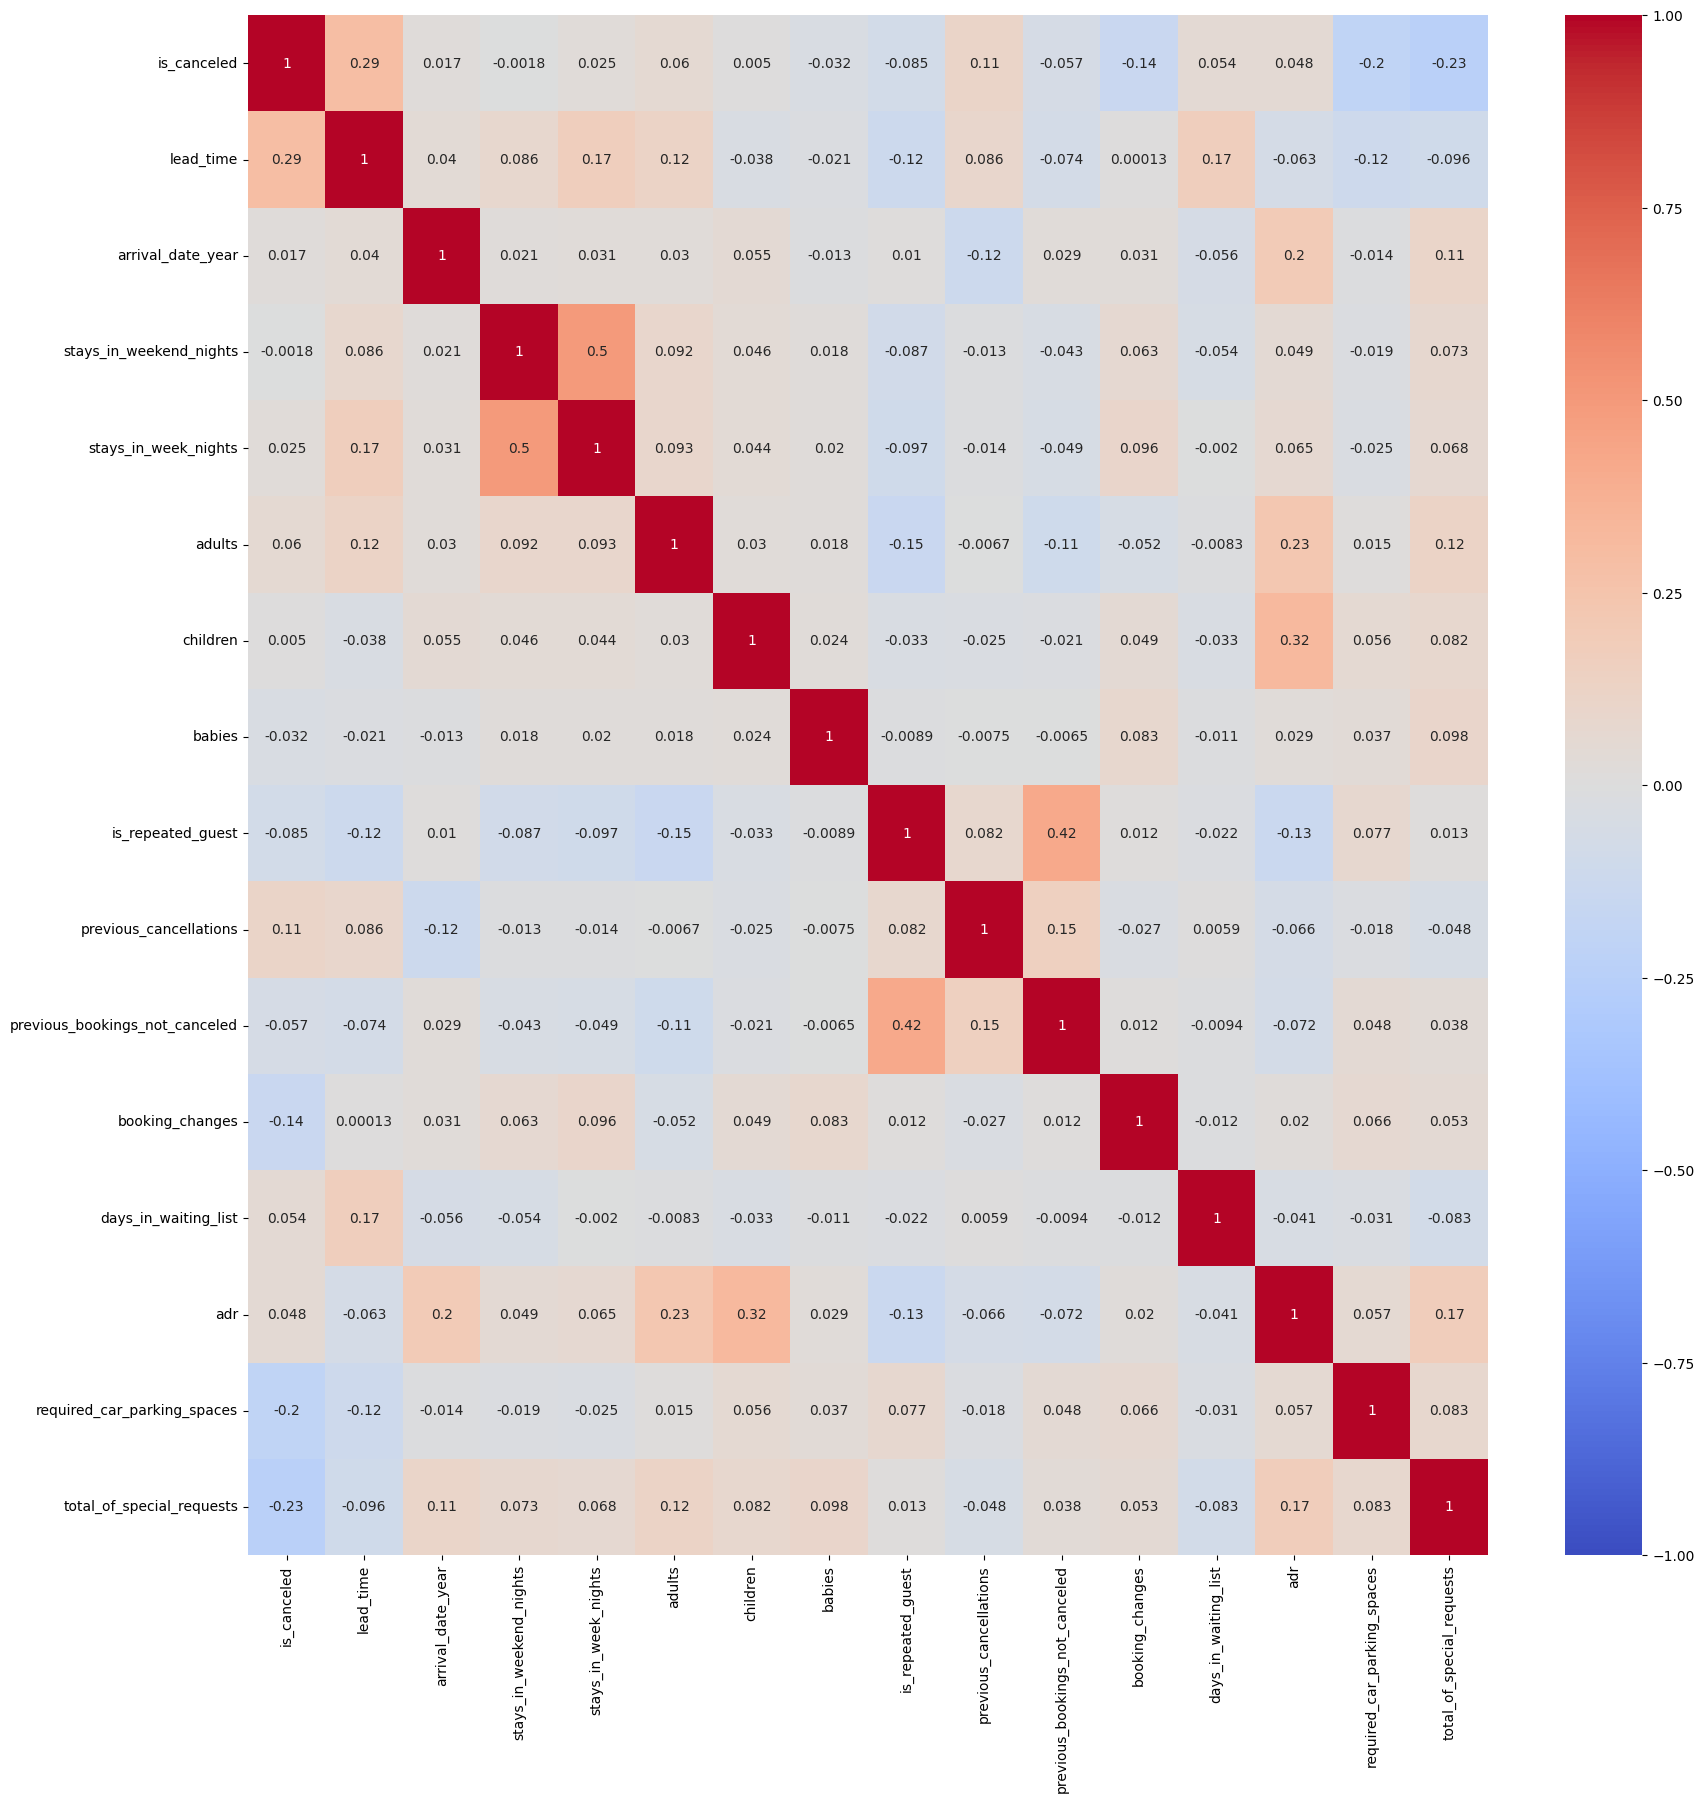

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(hotel_df[cols].corr(), cmap = 'coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

In [21]:
hotel_df.isna().mean()

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000
children,0.000034
babies,0.000000


In [22]:
hotel_df = hotel_df.dropna()

In [23]:
hotel_df[hotel_df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,1,2015,October,0,3,0,0.0,0,...,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0
2409,Resort Hotel,0,0,2015,October,0,0,0,0.0,0,...,0,A,I,0,No Deposit,0,Transient,0.00,0,0
3181,Resort Hotel,0,36,2015,November,1,2,0,0.0,0,...,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0
3684,Resort Hotel,0,165,2015,December,1,4,0,0.0,0,...,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0
3708,Resort Hotel,0,165,2015,December,2,4,0,0.0,0,...,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,1,3,0,2.0,0,...,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117274,City Hotel,0,276,2017,July,2,1,0,2.0,0,...,0,B,B,1,No Deposit,0,Transient,93.64,0,2
117303,City Hotel,0,291,2017,July,2,2,0,2.0,0,...,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117453,City Hotel,0,159,2017,July,1,3,0,2.0,0,...,0,A,A,1,No Deposit,0,Transient,121.88,0,1


## 피처엔지니어링

In [24]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0


In [25]:
hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [26]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0
3,Resort Hotel,0,13,2015,July,0,1,1,0.0,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,1.0
4,Resort Hotel,0,14,2015,July,0,2,2,0.0,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2.0


In [27]:
hotel_df = hotel_df[hotel_df['people'] != 0]

In [28]:
hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [29]:
hotel_df[hotel_df['total_nights'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
167,Resort Hotel,0,111,2015,July,0,0,2,0.0,0,...,H,0,No Deposit,0,Transient,0.0,0,2,2.0,0
168,Resort Hotel,0,0,2015,July,0,0,1,0.0,0,...,H,0,No Deposit,0,Transient,0.0,0,0,1.0,0
196,Resort Hotel,0,8,2015,July,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,0,0,1,0.0,0,...,A,0,No Deposit,0,Transient-Party,0.0,0,0,1.0,0
117701,City Hotel,0,0,2017,August,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118029,City Hotel,0,0,2017,August,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118631,City Hotel,0,78,2017,August,0,0,1,0.0,0,...,K,7,No Deposit,0,Transient-Party,0.0,0,0,1.0,0


In [30]:
session_dict = {'spring' : [3,4,5], 'summer':[6,7,8],'fall':[9,10,11], 'winter':[12,1,2]}

In [31]:
new_session_dict = {}
for i in session_dict:
  for j in session_dict[i]:
    new_session_dict[calendar.month_name[j]] = i

In [32]:
new_session_dict

{'March': 'spring',
 'April': 'spring',
 'May': 'spring',
 'June': 'summer',
 'July': 'summer',
 'August': 'summer',
 'September': 'fall',
 'October': 'fall',
 'November': 'fall',
 'December': 'winter',
 'January': 'winter',
 'February': 'winter'}

In [33]:
hotel_df['session'] = hotel_df['arrival_date_month'].map(new_session_dict)

In [34]:
hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype(int)

In [35]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'people',
       'total_nights', 'session', 'expected_room_type'],
      dtype='object')

In [36]:
hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])

In [37]:
hotel_df[~hotel_df['cancel_rate'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights,session,expected_room_type,cancel_rate
13808,Resort Hotel,0,6,2016,January,0,2,1,0.0,0,...,0,Transient,27.0,0,0,1.0,2,winter,0,0.0
13813,Resort Hotel,0,1,2016,February,0,2,1,0.0,0,...,0,Transient,27.0,0,0,1.0,2,winter,0,0.0
13814,Resort Hotel,0,6,2016,November,1,0,1,0.0,0,...,0,Transient,27.0,0,0,1.0,1,fall,1,0.0
13815,Resort Hotel,0,6,2017,January,0,1,1,0.0,0,...,0,Transient,35.0,0,0,1.0,1,winter,1,0.0
13817,Resort Hotel,0,1,2017,February,0,2,1,0.0,0,...,0,Transient-Party,35.0,0,0,1.0,2,winter,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117424,City Hotel,0,3,2017,August,0,1,2,1.0,0,...,0,Transient,95.0,0,4,3.0,1,summer,1,0.0
117841,City Hotel,0,7,2017,August,0,2,1,0.0,0,...,0,Transient,65.0,0,2,1.0,2,summer,1,0.0
118581,City Hotel,0,11,2017,August,0,2,2,0.0,0,...,0,Group,125.0,0,0,2.0,2,summer,1,0.0
118651,City Hotel,0,189,2017,August,2,0,2,0.0,0,...,0,Transient-Party,119.0,0,3,2.0,2,summer,1,0.0


In [38]:
hotel_df['cancel_rate'].fillna(-99, inplace=True)

In [39]:
hotel_df['cancel_rate']

,cancel_rate
0,-99.0
1,-99.0
2,-99.0
3,-99.0
4,-99.0
...,...
119385,-99.0
119386,-99.0
119387,-99.0
119388,-99.0


## 더미 변수 변환

In [40]:
hotel_df['adr'].dtype

dtype('float64')

In [41]:
hotel_df.select_dtypes('O').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'session'],
      dtype='object')

In [42]:
for col in hotel_df.select_dtypes('O').columns:
  print(f'{col} : {hotel_df[col].nunique()}')

hotel : 2
arrival_date_month : 12
meal : 5
country : 177
distribution_channel : 5
reserved_room_type : 9
assigned_room_type : 11
deposit_type : 3
customer_type : 4
session : 4


In [43]:
# country -> drop
hotel_df.drop('country', axis=1, inplace=True)

In [44]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118727 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  object 
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   arrival_date_year               118727 non-null  int64  
 4   arrival_date_month              118727 non-null  object 
 5   stays_in_weekend_nights         118727 non-null  int64  
 6   stays_in_week_nights            118727 non-null  int64  
 7   adults                          118727 non-null  int64  
 8   children                        118727 non-null  float64
 9   babies                          118727 non-null  int64  
 10  meal                            118727 non-null  object 
 11  distribution_channel            118727 non-null  object 
 12  is_repeated_guest    

In [45]:
hotel_df.select_dtypes('O').columns

Index(['hotel', 'arrival_date_month', 'meal', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'session'],
      dtype='object')

In [46]:
hotel_df = pd.get_dummies(hotel_df, columns = hotel_df.select_dtypes('O').columns)

## 모델링

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(hotel_df.drop('is_canceled', axis=1), hotel_df['is_canceled'], test_size=0.2, random_state=42)

In [48]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(94981, 74) (94981,) (23746, 74) (23746,)


In [49]:
hotel_df.head()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,session_fall,session_spring,session_summer,session_winter
0,0,342,2015,0,0,2,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
1,0,737,2015,0,0,2,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
2,0,7,2015,0,1,1,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
3,0,13,2015,0,1,1,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
4,0,14,2015,0,2,2,0.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False


In [50]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
pred1 = rf.predict(X_test)
proba1 = rf.predict_proba(X_test)[:, 1]

In [52]:
proba1

array([0.03027778, 0.22      , 1.        , ..., 0.        , 1.        ,
       0.63      ])

In [53]:
accuracy_score(y_test, pred1)

0.8622504842920913

In [54]:
confusion_matrix(y_test, pred1)

array([[13682,  1141],
       [ 2130,  6793]])

In [55]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14823
           1       0.86      0.76      0.81      8923

    accuracy                           0.86     23746
   macro avg       0.86      0.84      0.85     23746
weighted avg       0.86      0.86      0.86     23746



In [56]:
roc_auc_score(y_test, proba1)

0.9301087813221679

- support : 데이터 개수
- precision(정밀도) : 1이라고 예측한 것 중, 얼마 만큼을 제대로 맞추었는가? TP / (FP + TP) TYPE 1
- recal(재현율) : 실제 1인 것 중에, 얼마 만큼을 제대로 맞추었는가? TP / (FN + TP) TYPE 2
- f-1 Score : 조화 평균 , 2 * precsion * Recall / (precision + Recall)
- FPR(False Positive Rate)
- TPR(True Positive Rate)

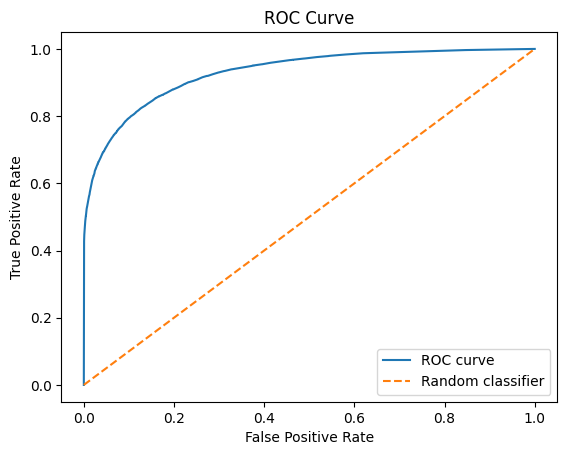

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, proba1)

# ROC Curve 그리기
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')  # 대각선 (랜덤 분류기)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 하이퍼 파라미터 튜닝

In [59]:
rf2 = RandomForestClassifier(random_state = 100, max_depth=10)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.8889354504940962

In [60]:
rf2 = RandomForestClassifier(random_state = 100, max_depth=30)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.9315542551118856

In [61]:
rf2 = RandomForestClassifier(random_state = 100, max_depth=50)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.9301010431062177

In [63]:
rf2 = RandomForestClassifier(random_state = 100, min_samples_split=5)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.9310330879687573

In [64]:
rf2 = RandomForestClassifier(random_state = 100, min_samples_split=3)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.9305752668367078

In [65]:
rf2 = RandomForestClassifier(random_state = 100, min_samples_split=7)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, proba2)

0.9306455420856163

## Grid Search

In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 150, 200],
    'max_depth' : [10, 20, 30],
    'min_samples_split' : [2, 3, 4]
}

In [67]:
rf3 = RandomForestClassifier(random_state = 100)
grid_cv = GridSearchCV(rf3, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]})

In [70]:
grid_cv.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

In [74]:
proba3 = grid_cv.predict_proba(X_test)
roc_auc_score(y_test, proba3[:, 1])

0.9326291942406293

## 피처 임포턴스

In [75]:
rf4 = RandomForestClassifier(random_state = 100, max_depth=30, min_samples_split=2, n_estimators=200)
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=100)

In [76]:
proba4 = rf4.predict_proba(X_test)
roc_auc_score(y_test, proba4[:, 1])

0.9326291942406293

In [80]:
feat_imp = pd.DataFrame({'features':X_train.columns, 'importances':rf4.feature_importances_}).sort_values('importances', ascending=False)

In [81]:
top10 = feat_imp.head(10)

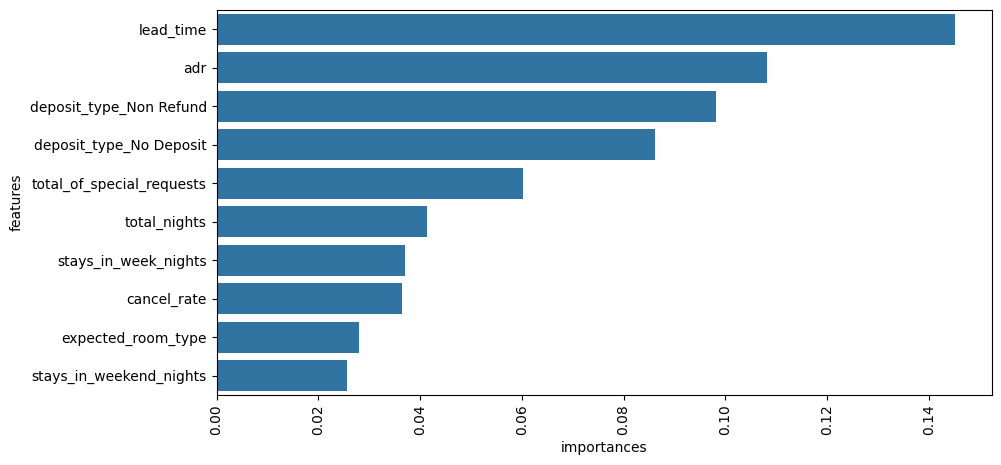

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top10['importances'], y=top10['features'])
plt.xticks(rotation=90)
plt.show()